In [2]:
# imports and stuff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit 
from machine_learning.utility import show

### I] Importing data

In [3]:
import os 
import tarfile 
import urllib 

# HOUSING_URL = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz"
# DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handsonml2/master/" 
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/" 
HOUSING_PATH = os.path.join("datasets", "housing") 
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz" 
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH): 
    os.makedirs(housing_path, exist_ok=True) 
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path) 
    housing_tgz = tarfile.open(tgz_path) 
    housing_tgz.extractall(path=housing_path) 
    housing_tgz.close()
    
fetch_housing_data()

C:\Users\RISHABH\AppData\Local\Temp\ipykernel_9424\3500036347.py:15: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


Inspecting Data

In [4]:
def load_housing_data(housing_path=HOUSING_PATH): 
    csv_path = os.path.join(housing_path, "housing.csv") 
    return pd.read_csv(csv_path)
housing = load_housing_data()

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"] = housing["ocean_proximity"].astype("category")
housing.dtypes


longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity       category
dtype: object

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Visualising data

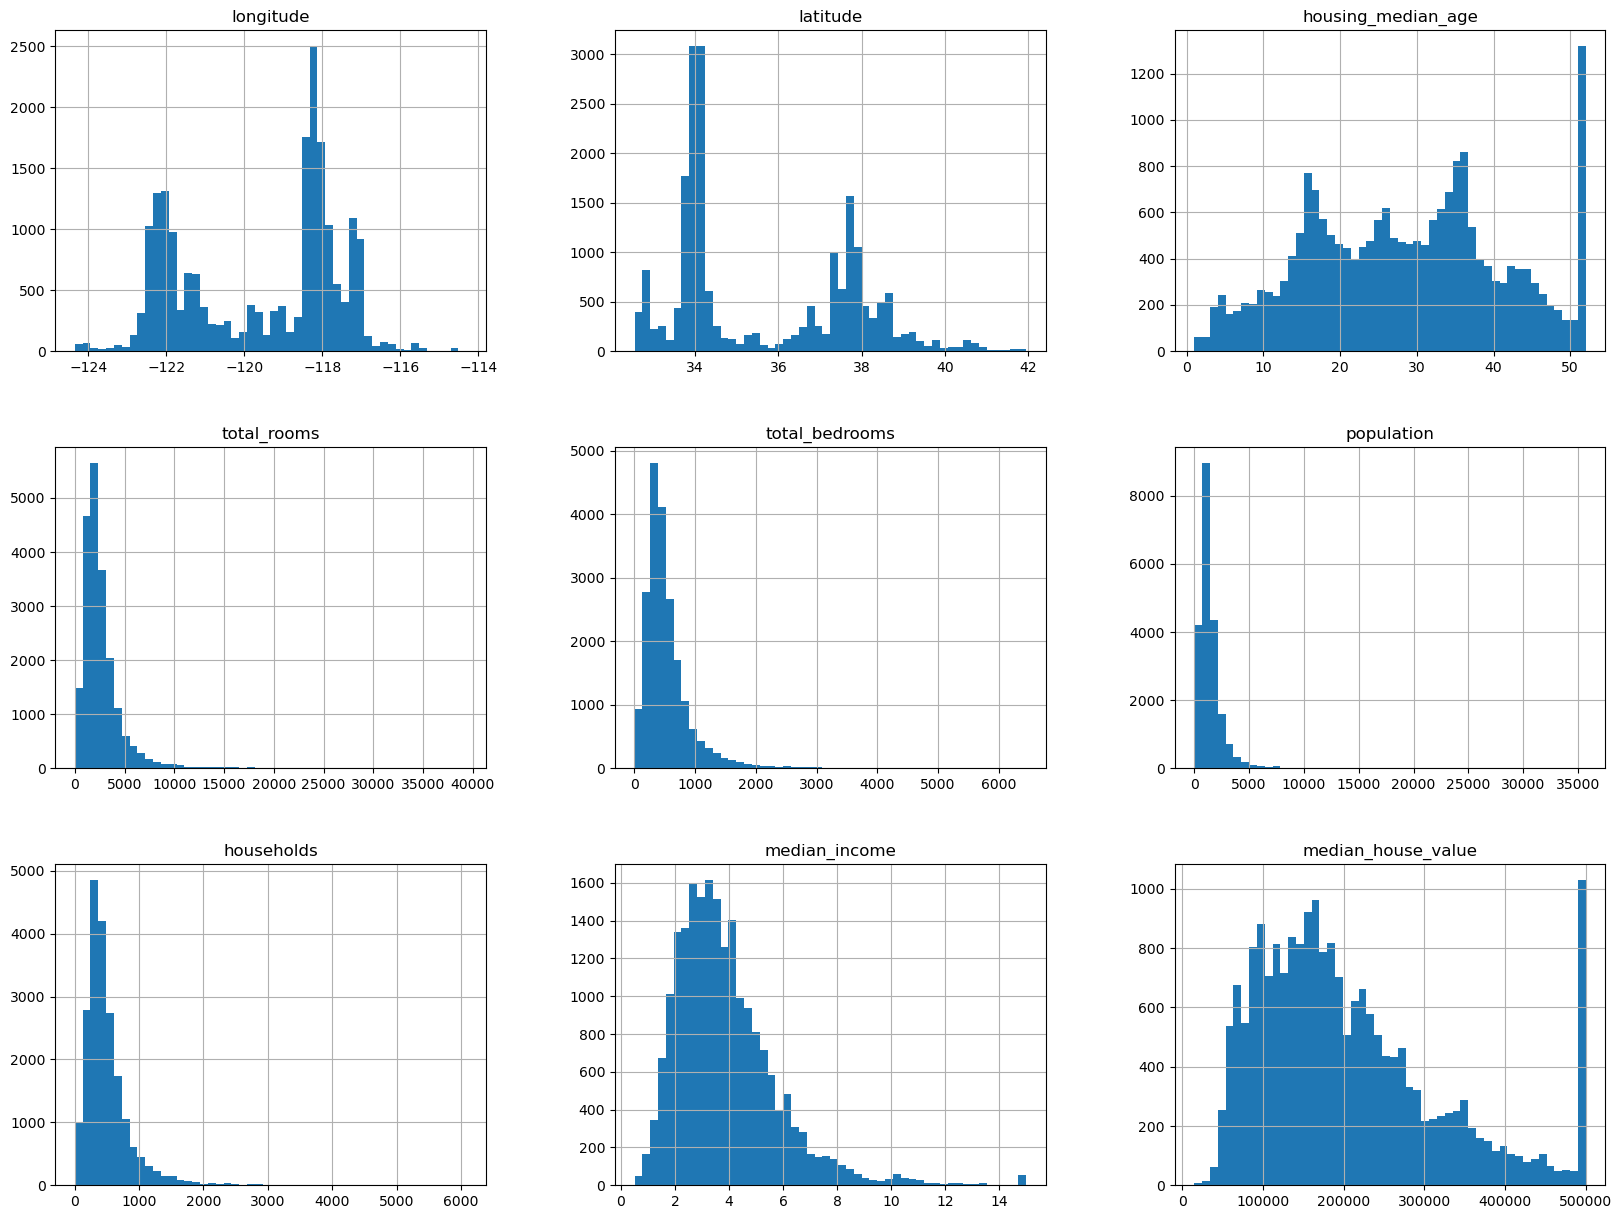

In [9]:
housing.hist(bins = 50, figsize = (20,15))
plt.show()

### II Creating Test set

1] Simple split
-- Picking some instances randomly (typically 20%)

In [10]:
# limitation1 : repeated random splitting mixes training and testing set, Hence select the test set and freeze it..
# limitation2 : doesn't deal with change/update in dataset
def split_train_test(data, test_ratio):
    shuffled_data = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_set = shuffled_data[:test_set_size]
    train_set = shuffled_data[test_set_size:]
    return data.iloc[train_set], data.iloc[test_set]

random_train_set, random_test_set = split_train_test(housing, 0.2)

show(random_test_set = len(random_test_set),
     random_train_set = len(random_train_set))


random_test_set: 
 4128

random_train_set: 
 16512


2]Random generator seed -- freezes randomness

In [11]:
# seed = label to a particular random shuffle
# limitation: doesn't deal with changed data or upadated data
def split_train_test_freezed(data, test_ratio, seed):
    np.random.seed(seed)
    shuffled_data = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_set = shuffled_data[:test_set_size]
    train_set = shuffled_data[test_set_size:]
    return data.iloc[train_set], data.iloc[test_set]

freezed_random_train_set, freezed_random_test_set = split_train_test_freezed(housing, 0.2, 42)

show(freezed_random_test_set = (freezed_random_test_set),
     freezed_random_train_set = (freezed_random_train_set))


freezed_random_test_set: 
        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -119.01     36.06                25.0       1505.0             NaN   
3024     -119.46     35.14                30.0       2943.0             NaN   
15663    -122.44     37.80                52.0       3830.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   
9814     -121.93     36.62                34.0       2351.0             NaN   
...          ...       ...                 ...          ...             ...   
15362    -117.22     33.36                16.0       3165.0           482.0   
16623    -120.83     35.36                28.0       4323.0           886.0   
18086    -122.05     37.31                25.0       4111.0           538.0   
2144     -119.76     36.77                36.0       2507.0           466.0   
3665     -118.37     34.22                17.0       1787.0           463.0   

       population  hous

3] Instance identifier -- hashing Id's , testSet = hashedValue < 20%

In [12]:
# limitation: then can only add new rows below the last row
housing["index"] = housing.index
housing.drop(columns=["index"], axis=1, inplace=True)

In [13]:
# More stable way: make a unique identifier by intution
housing["id"] = housing["longitude"] * 1000 + housing["latitude"]

<Axes: >

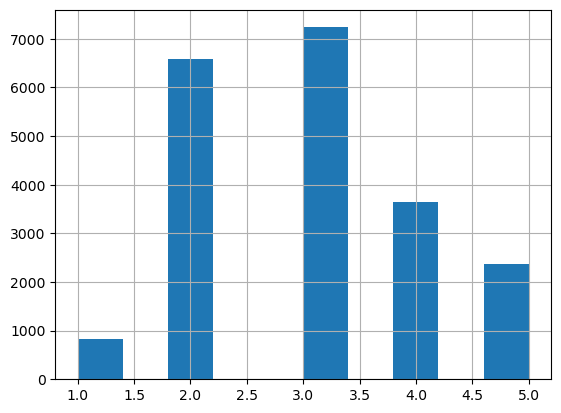

In [14]:
housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [15]:
# Deals with updated data as well
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

train_set_by_id, test_set_by_id =  split_train_test_by_id(housing, 0.2, id_column="id")

show(
    test_set_by_id = (test_set_by_id),
    train_set_by_id = (train_set_by_id)
     )
train_set = train_set_by_id
test_set = test_set_by_id


test_set_by_id: 
        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
59       -122.29     37.82                 2.0        158.0            43.0   
60       -122.29     37.83                52.0       1121.0           211.0   
61       -122.29     37.82                49.0        135.0            29.0   
62       -122.29     37.81                50.0        760.0           190.0   
67       -122.29     37.80                52.0       1027.0           244.0   
...          ...       ...                 ...          ...             ...   
20616    -121.53     39.08                15.0       1810.0           441.0   
20617    -121.53     39.06                20.0        561.0           109.0   
20618    -121.55     39.06                25.0       1332.0           247.0   
20632    -121.45     39.26                15.0       2319.0           416.0   
20633    -121.53     39.19                27.0       2080.0           412.0   

       population  households  m

In [16]:
housing.drop(columns=["id"], inplace=True)

4] Stratified sampling -- test set to have almost same proportions as train set

<Axes: >

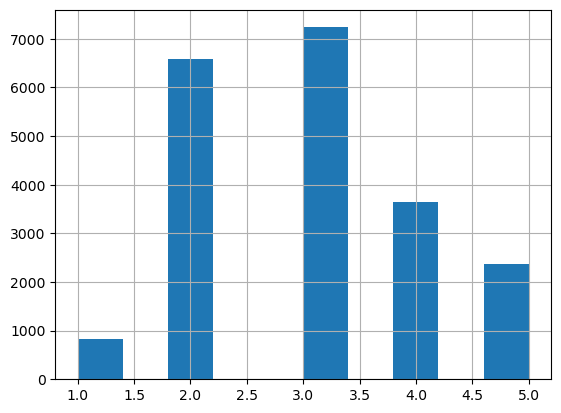

In [17]:
housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(housing, housing["income_cat"]): 
    strat_train_set = housing.loc[train_index] 
    strat_test_set = housing.loc[test_index]

In [19]:
compare = pd.DataFrame({
    "Overall": housing["income_cat"].value_counts() / len(housing),
    "Stratified": strat_test_set["income_cat"].value_counts() / len(strat_test_set),
    "Random": test_set["income_cat"].value_counts() / len(test_set)
})

compare["Rand. %error"] = 100 * (compare["Random"] / compare["Overall"] - 1)
compare["Strat. %error"] = 100 * (compare["Stratified"] / compare["Overall"] - 1)

compare.sort_index()


,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.039833,0.019271,0.364964
2,0.318847,0.318798,0.321214,0.742245,-0.015195
3,0.350581,0.350533,0.366142,4.438438,-0.013820
4,0.176308,0.176357,0.171144,-2.929015,0.027480
5,0.114438,0.114341,0.101667,-11.159359,-0.084674


In [20]:
for set_ in (strat_train_set, strat_test_set): 
    set_.drop("income_cat", axis=1, inplace=True)

### III Data visualisation for insights

Visualising geographical data

In [21]:
# copying data to not disturb the main training set..
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

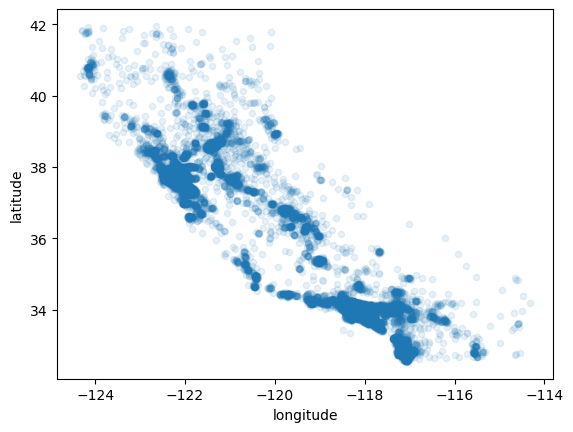

In [22]:
housing.plot(kind="scatter", x = "longitude", y="latitude", alpha=0.1)

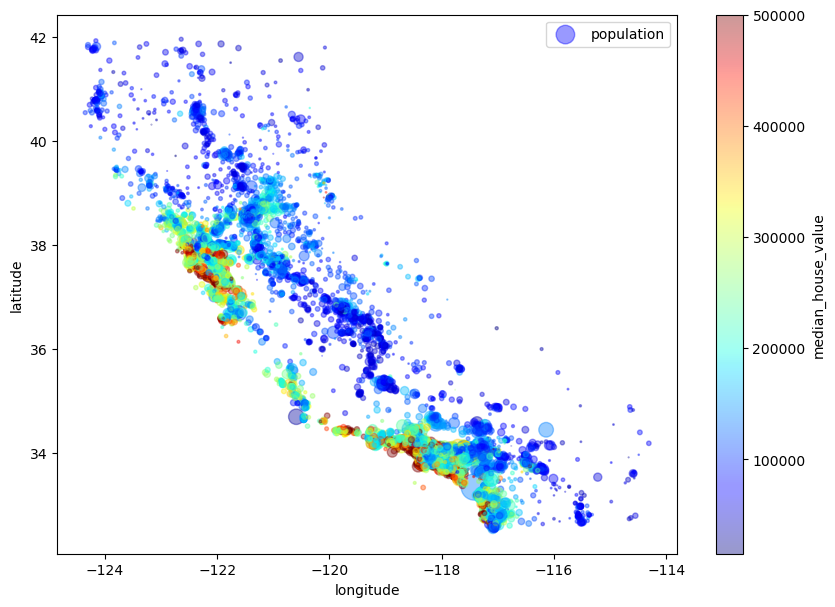

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.4,
             s = housing["population"]/100, label ="population", figsize = (10,7),
             c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True,)
plt.legend()

Looking for Correlation

<Axes: >

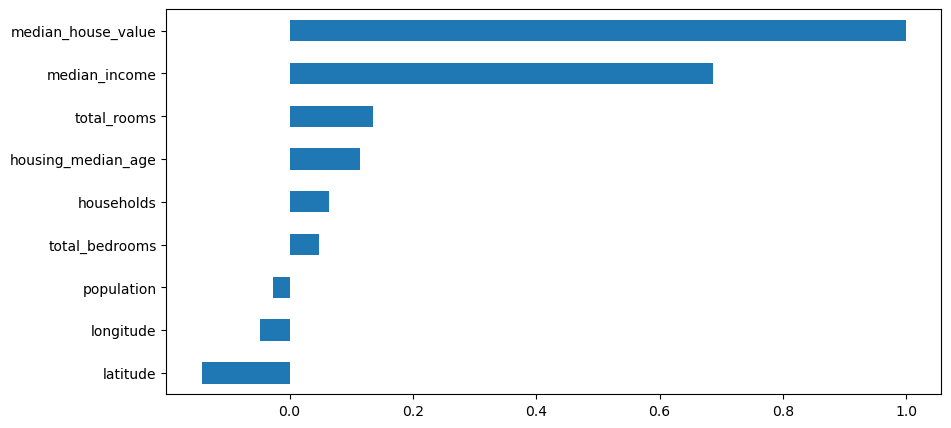

In [24]:
# pearson's correlation {standard correlation coefficient}
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=True).plot(kind="barh" ,figsize = (10,5))

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

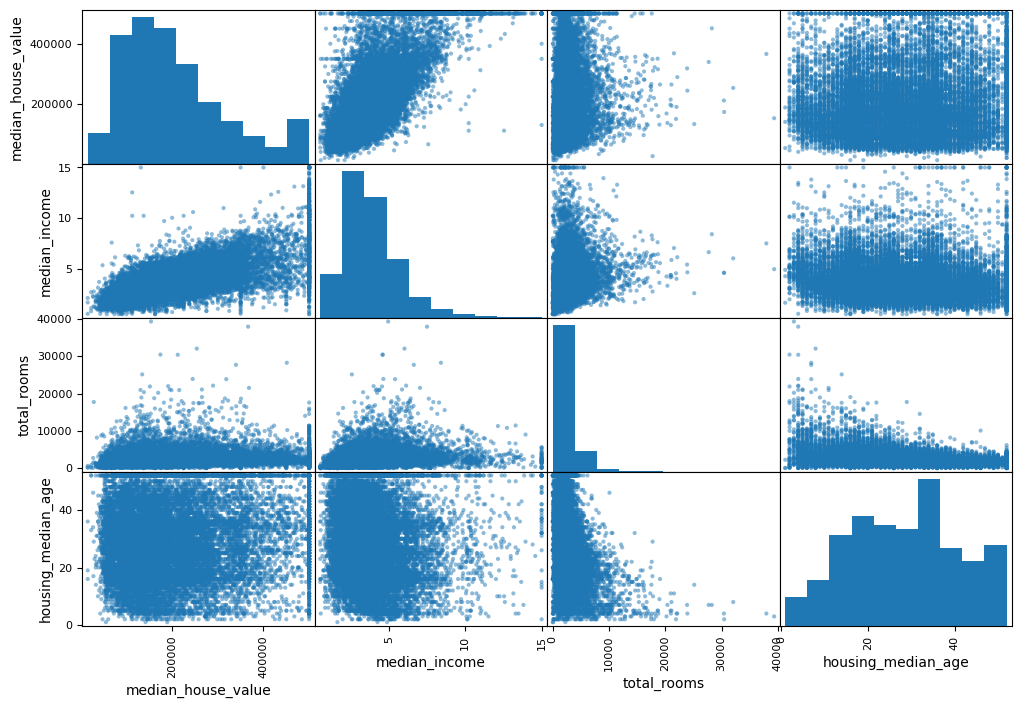

In [25]:
from pandas.plotting import scatter_matrix 
attributes = ["median_house_value", "median_income", "total_rooms", 
"housing_median_age"] 
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

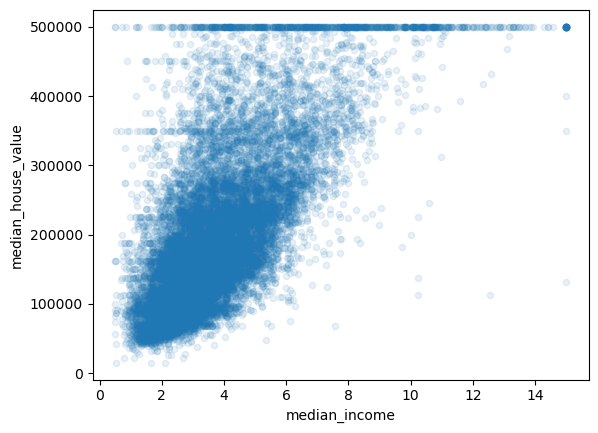

In [26]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", 
alpha=0.1)

Attribute combinations

In [27]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"] 
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"] 
housing["population_per_household"]=housing["population"]/housing["households"]

<Axes: >

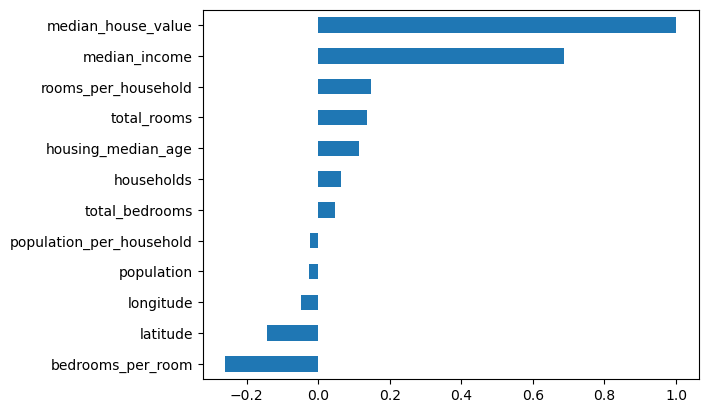

In [28]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=True).plot(kind="barh")

### IV Preparing data

In [29]:
# Training set
housing = strat_train_set.drop("median_house_value", axis=1) 
housing_labels = strat_train_set["median_house_value"].copy()
show(housing=housing,
     housing_labels=housing_labels)


housing: 
        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_i

##### Data cleaning

Handling Numeric data

In [30]:
# SimpleImputer -> To handle missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)
imputer.statistics_

X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


Handling categorical data

In [31]:
housing_cat = housing[["ocean_proximity"]]

In [32]:
# 1] Ordinal encoding
# -> limitation --> increasing in value of encoded number == better which is wrong in some cases
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
ordinal_encoder.categories_
housing_cat_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], shape=(16512, 1))

In [33]:
# 2] One-hot-encoding
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Custom transformers

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin 

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 

class CombinedAttributesAdder(BaseEstimator, TransformerMixin): 
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs 
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    def fit(self, X, y=None): 
        return self  # nothing else to do 
    def transform(self, X, y=None): 
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix] 
        population_per_household = X[:, population_ix] / X[:, households_ix] 
        if self.add_bedrooms_per_room: 
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix] 
            return np.c_[X, rooms_per_household, population_per_household, 
                         bedrooms_per_room] 
 
        else: 
            return np.c_[X, rooms_per_household, population_per_household] 
 
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False) 
housing_extra_attribs = attr_adder.transform(housing.values)

Feature Scaling : Normalisation (MinMaxScaler) && Standardisation (StandardScaler)

Transformation pipeplines

In [36]:
#  -- Helps with sequence of transformations. {imputer, scaler, custom transformer etc..}
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler()),
]) 

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [39]:
# version 0.20 : ColumnTransformer
# --> Introduced to enable us handle numerical and categorical columns simultaneously!
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
                                  ])

housing_prepared = full_pipeline.fit_transform(housing)

#### Select and train a model

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [77]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_prepared_data = full_pipeline.transform(some_data)
show(
    Predictions = lin_reg.predict(some_prepared_data),
    Labels = list(some_labels)
)


Predictions: 
 [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]

Labels: 
 [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [82]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
mse = mean_squared_error(housing_predictions, housing_labels)
rmse = np.sqrt(mse)
rmse

np.float64(68627.87390018743)

In [83]:
# Linear regression underfitted -> Lets use more complex algo

In [86]:
from sklearn.tree import DecisionTreeRegressor

Decision_tree = DecisionTreeRegressor()
Decision_tree.fit(housing_prepared, housing_labels)
Decision_housing_predictions = Decision_tree.predict(housing_prepared)
mse = mean_squared_error(Decision_housing_predictions, housing_labels)
rmse = np.sqrt(mse)
rmse

np.float64(0.0)

cross validation

In [92]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Decision_tree, housing_prepared, housing_labels, 
                         scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [93]:
show(
    Scores = tree_rmse_scores,
    Mean = tree_rmse_scores.mean(),
    Standard_deviation = tree_rmse_scores.std()
)


Scores: 
 [73113.72778983 71159.12200633 67994.20156573 71429.76764569
 69459.97090064 77089.6830218  68846.87805623 71699.63464704
 68677.69957342 71559.31653586]

Mean: 
 71103.00017425601

Standard_deviation: 
 2527.7235809270383
